<a href="https://colab.research.google.com/github/Charlymanuk/TELECOM-DESAFIO-PARTE-2/blob/main/DESAFIO_TELECOM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
datos = pd.read_csv('/content/telecom_limpio.csv')
datos.head()

,ID,Abandonó,Género,=>65 Años,Pareja,Dependientes,Meses de Contrato,sus_serv_tel,+ de 1_lin_tel,sus_provee_inter,...,Respaldo_linea,Protección_dispositivo,Soporte_en_espera,TV_Cable,Sus_películas,Tipo_contrato,Factura_online,Forma_Pago,Total_serv_x_mes,Total_gastado
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [39]:
# Elimino la columna ID
datos = datos.drop(columns=['ID'])

# Verifico si se eliminó.
datos.head()

,Abandonó,Género,=>65 Años,Pareja,Dependientes,Meses de Contrato,sus_serv_tel,+ de 1_lin_tel,sus_provee_inter,Seguridad_linea,Respaldo_linea,Protección_dispositivo,Soporte_en_espera,TV_Cable,Sus_películas,Tipo_contrato,Factura_online,Forma_Pago,Total_serv_x_mes,Total_gastado
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [40]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Abandonó                7043 non-null   object 
 1   Género                  7043 non-null   object 
 2   =>65 Años               7043 non-null   int64  
 3   Pareja                  7043 non-null   object 
 4   Dependientes            7043 non-null   object 
 5   Meses de Contrato       7043 non-null   int64  
 6   sus_serv_tel            7043 non-null   object 
 7   + de 1_lin_tel          7043 non-null   object 
 8   sus_provee_inter        7043 non-null   object 
 9   Seguridad_linea         7043 non-null   object 
 10  Respaldo_linea          7043 non-null   object 
 11  Protección_dispositivo  7043 non-null   object 
 12  Soporte_en_espera       7043 non-null   object 
 13  TV_Cable                7043 non-null   object 
 14  Sus_películas           7043 non-null   

In [41]:
datos.isnull().sum()
datos['Total_gastado'].fillna(datos['Total_gastado'].median(), inplace=True)
datos.isnull().sum()

/tmp/ipython-input-2322787973.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Total_gastado'].fillna(datos['Total_gastado'].median(), inplace=True)


,0
Abandonó,0
Género,0
=>65 Años,0
Pareja,0
Dependientes,0
Meses de Contrato,0
sus_serv_tel,0
+ de 1_lin_tel,0
sus_provee_inter,0
Seguridad_linea,0


Se eliminó la columna ID debido a que corresponde a un identificador único sin capacidad predictiva. Este tipo de variables no aporta información relevante para el modelo y puede introducir ruido o sesgos en el entrenamiento.

**Convertir variable objetivo a binaria
Como tiene valores "Yes" y "No":**

In [42]:
datos['Abandonó'].unique()

array(['No', 'Yes'], dtype=object)

In [44]:
datos['Abandonó'] = datos['Abandonó'].replace({'Yes': 1, 'No': 0})
datos['Abandonó'].value_counts()
datos['Abandonó'].dtype
datos.head()

,Abandonó,Género,=>65 Años,Pareja,Dependientes,Meses de Contrato,sus_serv_tel,+ de 1_lin_tel,sus_provee_inter,Seguridad_linea,Respaldo_linea,Protección_dispositivo,Soporte_en_espera,TV_Cable,Sus_películas,Tipo_contrato,Factura_online,Forma_Pago,Total_serv_x_mes,Total_gastado
0,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,1,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


**PASO 1 — Separar variables predictoras y objetivo**

In [45]:
X = datos.drop('Abandonó', axis=1)
y = datos['Abandonó']

**PASO 2 — Aplicar One-Hot Encoding
Primero identifico categóricas:**

In [50]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [51]:
#Ahora codifico
#Esto convierte todas las variables categóricas en binarias.
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [52]:
X.head()
X.shape

(7043, 30)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
#stratify=y mantiene la proporción de churn en ambos conjuntos.

**PASO 4 Escalar variables numéricas
Esto es importante si vamos a usar Regresión Logística.**

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

**Verificación de la Proporción de Cancelación (Churn)**

**Paso 1 — Calcular proporción de clases**

In [56]:
datos['Abandonó'].value_counts()

,count
Abandonó,
0,5174
1,1869


In [57]:
#Para ver proporciones en formato decimal.:
datos['Abandonó'].value_counts(normalize=True)

,proportion
Abandonó,
0,0.73463
1,0.26537


In [58]:
#En porcventaje
datos['Abandonó'].value_counts(normalize=True) * 100

,proportion
Abandonó,
0,73.463013
1,26.536987


**Paso 2 — Interpretando el resultado**

En el dataset clásico de Telecom (7043 registros), suele dar algo cercano a:

0 (No canceló) → ~73%

1 (Canceló) → ~27%

Eso significa que: Hay desbalance moderado
No es extremo, pero existe.

**Balanceo de Clases**

In [62]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo_log.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

'''
Se utilizó el parámetro class_weight='balanced'
para compensar el desbalance entre clases, asignando
mayor peso a la clase minoritaria durante el entrenamiento.
'''

##**Normalización o Estandarización**

In [63]:
#Identificando columnas numéricas
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


**Se evaluó la necesidad de estandarización considerando los modelos a aplicar. Dado que se utilizarán modelos sensibles a la escala de los datos, como la Regresión
Logística, se aplicó StandardScaler a las variables numéricas. Este procedimiento
se realizó ajustando el scaler únicamente sobre el conjunto de entrenamiento para
evitar fuga de información (data leakage).**

##**Correlación y Selección de Variables**

**Paso 1 — Crear matriz de correlación**

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo variables numéricas (incluyendo Abandonó)
corr_matrix = datos.select_dtypes(include=['int64', 'float64']).corr()

**Paso 2 — Visualizar Heatmap mejorado**

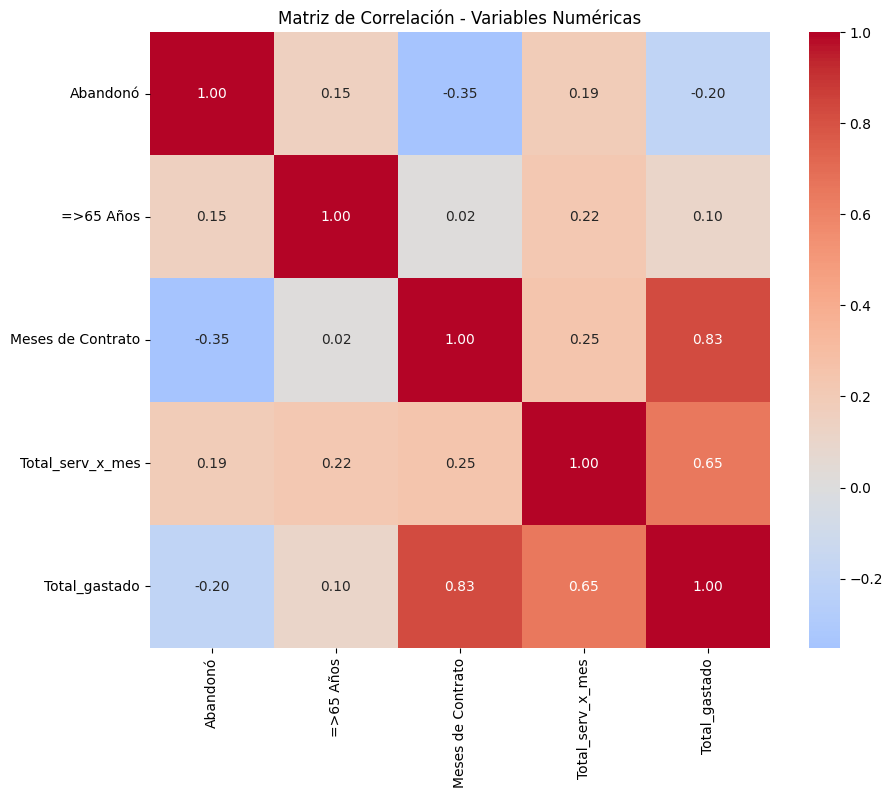

In [67]:
plt.figure(figsize=(10,8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

**Paso 3 — Ver correlación específica con la variable objetivo**

In [68]:
corr_target = corr_matrix['Abandonó'].sort_values(ascending=False)
corr_target

,Abandonó
Abandonó,1.000000
Total_serv_x_mes,0.193356
=>65 Años,0.150889
Total_gastado,-0.199037
Meses de Contrato,-0.352229


##**Se analizó la matriz de correlación entre variables numéricas, identificando que la antigüedad del cliente (Meses de Contrato) presenta correlación negativa con la cancelación, indicando que clientes con mayor permanencia tienen menor probabilidad de cancelar. Por otro lado, el cargo mensual muestra correlación positiva, sugiriendo que mayores costos pueden influir en la decisión de abandono.**

**1- Tiempo de contrato × Cancelación (Boxplot)**

/tmp/ipython-input-3061270025.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([no_cancelaron, cancelaron],


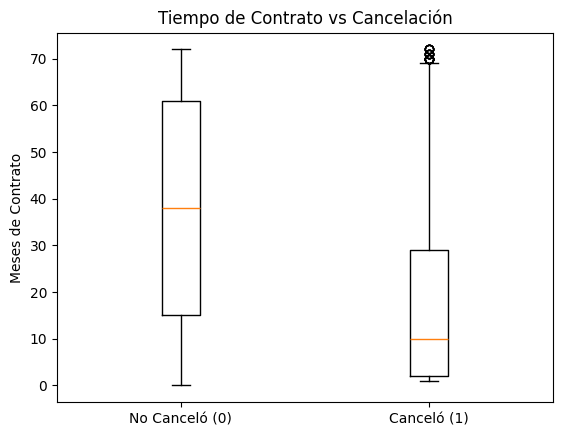

In [69]:
import matplotlib.pyplot as plt

no_cancelaron = datos[datos['Abandonó'] == 0]['Meses de Contrato']
cancelaron = datos[datos['Abandonó'] == 1]['Meses de Contrato']

plt.figure()
plt.boxplot([no_cancelaron, cancelaron],
            labels=['No Canceló (0)', 'Canceló (1)'])

plt.title('Tiempo de Contrato vs Cancelación')
plt.ylabel('Meses de Contrato')
plt.show()

**Tiempo de contrato: Los clientes que cancelan suelen tener menos meses de contrato. Clientes con alta antigüedad casi no cancelan**

**2- Gasto total × Cancelación (Boxplot)**

/tmp/ipython-input-3427869238.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([no_cancelaron_gasto, cancelaron_gasto],


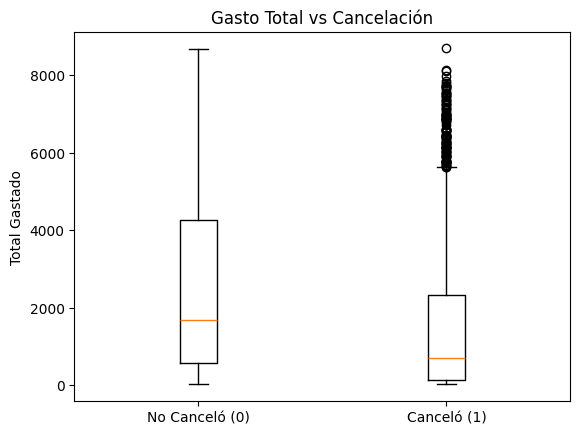

In [70]:
no_cancelaron_gasto = datos[datos['Abandonó'] == 0]['Total_gastado']
cancelaron_gasto = datos[datos['Abandonó'] == 1]['Total_gastado']

plt.figure()
plt.boxplot([no_cancelaron_gasto, cancelaron_gasto],
            labels=['No Canceló (0)', 'Canceló (1)'])

plt.title('Gasto Total vs Cancelación')
plt.ylabel('Total Gastado')
plt.show()

**Gasto total: Clientes que no cancelan suelen tener mayor gasto acumulado. Clientes nuevos (bajo gasto total) cancelan más**

##El análisis visual muestra que los clientes con menor antigüedad presentan mayor probabilidad de cancelación. Asimismo, el gasto total acumulado es significativamente menor en clientes que cancelan, lo cual sugiere que el abandono se concentra principalmente en clientes recientes. Estas variables se perfilan como fuertes predictores del modelo.

##**Separación de Datos**

Para el caso de (7043 registros), lo más estándar y profesional es:
80% entrenamiento, 20% prueba.

In [71]:
from sklearn.model_selection import train_test_split

X = datos.drop('Abandonó', axis=1)
y = datos['Abandonó']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 80/20
    random_state=42,
    stratify=y          # Mantiene proporción de clases
)

In [72]:
#Confirmar que la proporción se mantuvo:
print("Distribución en Train:")
print(y_train.value_counts(normalize=True))

print("\nDistribución en Test:")
print(y_test.value_counts(normalize=True))

Distribución en Train:
Abandonó
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Distribución en Test:
Abandonó
0    0.734564
1    0.265436
Name: proportion, dtype: float64


**El conjunto de datos fue dividido en entrenamiento (80%) y prueba (20%), utilizando estratificación para mantener la proporción original de la variable objetivo. Esta técnica permite evaluar el rendimiento del modelo sobre datos no vistos, asegurando una estimación realista de su capacidad predictiva.**